In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

xlsx = pd.ExcelFile('/content/drive/MyDrive/Colab Notebooks/DATA 301 Final Project/SSDB_Raw_Data.xlsx')

Mounted at /content/drive


In [ ]:
df_incidents_updated = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA 301 Final Project/incidents_1991_2017.csv")
df_incidents_updated.head()

,Incident_ID,Sources,Number_News,Media_Attention,Reliability,Date,Quarter,School,City,State,...,Officer_Involved,Bullied,Domestic_Violence,Gang_Related,Preplanned,Shots_Fired,Active_Shooter_FBI,Year,Month,Day
0,20171231WAPIM,https://www.heraldnet.com/news/police-say-they...,NaN,NaN,2,2017-12-31,Winter,Pinewood Elementary School,Marysville,WA,...,No,No,No,No,No,60,No,2017,12,31
1,20171231LAEDA,https://www.nola.com/crime/index.ssf/2017/01/a...,NaN,NaN,2,2017-12-31,Winter,Edna Karr High School,Algiers,LA,...,No,No,No,No,No,<30,No,2017,12,31
2,20171227CALIL,https://www.dailynews.com/2017/12/28/man-argui...,NaN,NaN,2,2017-12-27,Winter,Lincoln Elementary School,Lancaster,CA,...,No,No,No,No,No,2,No,2017,12,27
3,20171219MIBEB,http://www.wnem.com/story/37105109/breaking-po...,NaN,NaN,2,2017-12-19,Winter,Beecher High School,Beecher,MI,...,No,No,No,No,No,NaN,No,2017,12,19
4,20171214TXELD,https://www.nbcdfw.com/news/local/Dallas-ISD-G...,NaN,NaN,2,2017-12-14,Winter,Elisha M. Pease Elementary School,Dallas,TX,...,No,No,No,No,No,1,No,2017,12,14


In [ ]:
df_state_pops = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA 301 Final Project/state_pops.csv')
df_state_pops.head()

,State,Year,Population
0,AL,1991,4099156
1,AK,1991,570193
2,AZ,1991,3788576
3,AR,1991,2383144
4,CA,1991,30470736


In [ ]:
df_incidents_updated["State"].value_counts().head()

CA    121
TX     77
FL     58
MI     41
IL     41
Name: State, dtype: int64

In [ ]:
year_state = pd.DataFrame(df_incidents_updated.groupby("State")['Year'].value_counts())
year_state.columns = ["Num_Shootings"]
year_state.head()

Num_Shootings
State Year               
AK    1997              1
      2000              1
      2005              1
AL    2017              3
      1992              2

In [ ]:
df_pop_prop = []
for tuple_ in year_state.index.values:
    pop = df_state_pops[(df_state_pops["State"] == tuple_[0]) & (df_state_pops["Year"] == tuple_[1])]
    if len(pop["Population"].values) != 0:
        df_pop_prop.append(year_state.loc[tuple_] / pop["Population"].values[0] * 1000000)
df_pop_prop = pd.DataFrame(df_pop_prop)
df_pop_prop.index.names = ["State", "Year"]
df_pop_prop.columns = ["Shootings_Per_Mil"]
df_pop_prop

Shootings_Per_Mil
State Year                   
AK    1997           1.631407
      2000           1.592451
      2005           1.499372
AL    2017           0.615417
      1992           0.481462
...                       ...
WI    2015           0.173270
      2016           0.173049
      2017           0.172548
WV    1999           0.551938
WY    1993           2.113803

[486 rows x 1 columns]

**This data frame displays the shootings per million people for each state and year in the US. This gives us a relative rate of shootings to make comparisons.**

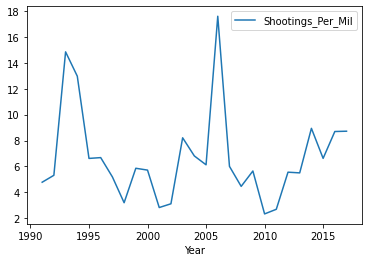

In [ ]:
df_pop_prop.groupby("Year").sum().plot.line()

**Line plot of the total school shootings per million residents in the US from all of the states over the time period of 1991-2017**

In [ ]:
df_legislation = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA 301 Final Project/legislation.csv')
df_legislation

,state,year,age18longgunpossess,age18longgunsale,age21handgunpossess,age21handgunsale,age21longgunpossess,age21longgunsale,age21longgunsaled,alcoholism,...,universal,universalh,universalpermit,universalpermith,violent,violenth,violentpartial,waiting,waitingh,lawtotal
0,AL,1991,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,15
1,AK,1991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
2,AZ,1991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
3,AR,1991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,CA,1991,0,1,0,1,0,0,0,1,...,1,1,1,1,1,1,1,1,1,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,VA,2017,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
1346,WA,2017,1,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,43
1347,WV,2017,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,21
1348,WI,2017,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,23


In [ ]:
total_leg_year_state = pd.DataFrame(df_legislation.groupby("year")["lawtotal"].sum())
# leg_year_state.columns = ["Num_Laws"]
total_leg_year_state

,lawtotal
year,
1991,863
1992,896
1993,923
1994,1021
1995,1035
1996,1059
1997,1073
1998,1121
1999,1127


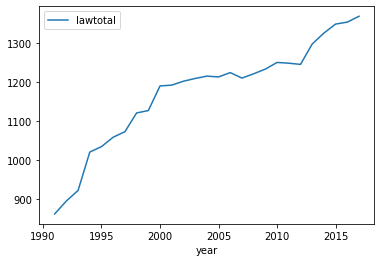

In [ ]:
total_leg_year_state.plot.line()

**Line plot of the total number of laws in the US over time**

# States with the Most Shootings

In [ ]:
df_shootings_state = df_pop_prop.groupby("State").sum().sort_values(by=["Shootings_Per_Mil"], ascending=False)
df_top10 = df_shootings_state.head(n=10)
df_top10.reset_index(inplace=True)
df_top10

,State,Shootings_Per_Mil
0,DC,30.976969
1,DE,6.954566
2,LA,6.675869
3,AL,5.461252
4,SC,5.316089
5,TN,4.781105
6,AK,4.723229
7,WA,4.375489
8,MT,4.357234
9,MI,4.149493


**States that had the highest rate of shootings per capita**

In [ ]:
top_10_states = ["DC", "DE", "LA", "AL", "SC", "TN", "AK", "WA", "MT", "MI"]
top_13 = ["LA", "AL", "SC", "TN", "AK", "WA", "MT", "MI", "NV", "MS", "NE"]

In [ ]:
from altair import *

In [ ]:
df_pop_prop2 = df_pop_prop.reset_index()
df_pop_prop2= df_pop_prop2[df_pop_prop2["State"].isin(top_10_states) == True]
df_pop_prop2

,State,Year,Shootings_Per_Mil
0,AK,1997,1.631407
1,AK,2000,1.592451
2,AK,2005,1.499372
3,AL,2017,0.615417
4,AL,1992,0.481462
...,...,...,...
470,WA,2003,0.163824
471,WA,2007,0.154761
472,WA,2010,0.148709
473,WA,2012,0.148709


In [ ]:
Chart(df_pop_prop2).mark_line().encode(
    x="Year",
    y="Shootings_Per_Mil",
    color="State"
)

alt.Chart(...)

**Line plots of the number shootings per capita for the 10 states with the most shootings from 1991-2017**

In [ ]:
df_top13_shoot = df_pop_prop.reset_index()
df_top13_shoot= df_top13_shoot[df_top13_shoot["State"].isin(top_13) == True]
df_top13_shoot

,State,Year,Shootings_Per_Mil
0,AK,1997,1.631407
1,AK,2000,1.592451
2,AK,2005,1.499372
3,AL,2017,0.615417
4,AL,1992,0.481462
...,...,...,...
470,WA,2003,0.163824
471,WA,2007,0.154761
472,WA,2010,0.148709
473,WA,2012,0.148709


In [ ]:
Chart(df_top13_shoot).mark_line().encode(
    x="Year",
    y="Shootings_Per_Mil",
    color="State"
)

alt.Chart(...)

**Line plots of the number shootings per capita for the 11 states with most shootings from 1991-2017 that do not include Washington D.C. and Delaware**

In [ ]:
df_shootings_state = df_pop_prop.groupby("State").sum().sort_values(by=["Shootings_Per_Mil"], ascending=False)
df_top10 = df_shootings_state.head(n=10)
df_top10.reset_index(inplace=True)
df_top10

,State,Shootings_Per_Mil
0,DC,30.976969
1,DE,6.954566
2,LA,6.675869
3,AL,5.461252
4,SC,5.316089
5,TN,4.781105
6,AK,4.723229
7,WA,4.375489
8,MT,4.357234
9,MI,4.149493


In [ ]:
df_legislation_top_9= df_legislation[df_legislation["state"].isin(top_10_states) == True]
df_legislation_top_9

,state,year,age18longgunpossess,age18longgunsale,age21handgunpossess,age21handgunsale,age21longgunpossess,age21longgunsale,age21longgunsaled,alcoholism,...,universal,universalh,universalpermit,universalpermith,violent,violenth,violentpartial,waiting,waitingh,lawtotal
0,AL,1991,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,15
1,AK,1991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
7,DE,1991,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,12
17,LA,1991,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
21,MI,1991,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,MI,2017,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,21
1325,MT,2017,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1339,SC,2017,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,12
1341,TN,2017,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22


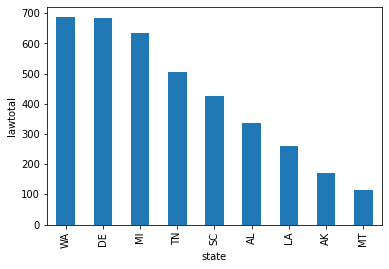

In [ ]:
df_legislation_top_9.groupby("state")["lawtotal"].sum().sort_values(ascending = False).plot.bar(ylabel = "lawtotal")

**Bar plot of the total number of gun laws for the top 9 states with the most shootings per capita (not including D.C.) from 1991-2017**

In [ ]:
Chart(df_legislation_top_9).mark_line().encode(
    x="year",
    y="lawtotal",
    color="state"
)

alt.Chart(...)

**Line plots of the total number of gun laws for the top 9 states with the most shootings per capita (not including D.C.) from 1991-2017**

In [ ]:
df_leg_delaware = df_legislation[df_legislation["state"] == "DE"][["state", "year", "lawtotal"]]
df_leg_delaware = df_leg_delaware.drop("state", axis =1)
df_leg_delaware.head()

,year,lawtotal
7,1991,12
57,1992,14
107,1993,14
157,1994,20
207,1995,21


In [ ]:
df_shootings_delaware = df_pop_prop2[df_pop_prop2["State"] == "DE"]
df_shootings_delaware.columns = ["state", "year", "Shootings_Per_Mil"]
df_shootings_delaware = df_shootings_delaware.drop("state", axis =1)
df_shootings_delaware

,year,Shootings_Per_Mil
83,2006,2.327563
84,1993,1.415673
85,2009,1.121416
86,2016,1.050348
87,2017,1.039567


In [ ]:
delaware_join = df_leg_delaware.merge(df_shootings_delaware, on="year", how="outer")
delaware_join["Shootings_Per_Mil"] = delaware_join["Shootings_Per_Mil"].fillna(0)
delaware_join

,year,lawtotal,Shootings_Per_Mil
0,1991,12,0.000000
1,1992,14,0.000000
2,1993,14,1.415673
3,1994,20,0.000000
4,1995,21,0.000000
5,1996,21,0.000000
6,1997,21,0.000000
7,1998,22,0.000000
8,1999,24,0.000000
9,2000,24,0.000000


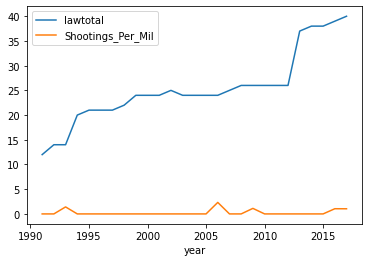

In [ ]:
delaware_join.plot.line(x = "year", y = ["lawtotal", "Shootings_Per_Mil"])

**Comparing shootings per capita in Delaware and the number of gun laws from 1991-2017**

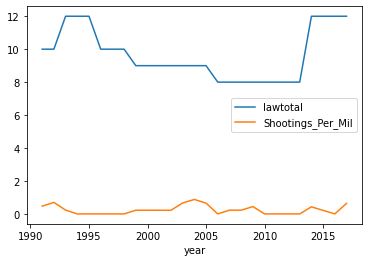

In [ ]:
df_leg_lousiana = df_legislation[df_legislation["state"] == "LA"][["state", "year", "lawtotal"]]
df_leg_lousiana = df_leg_lousiana.drop("state", axis =1)
df_shootings_lousiana = df_pop_prop2[df_pop_prop2["State"] == "LA"]
df_shootings_lousiana.columns = ["state", "year", "Shootings_Per_Mil"]
df_shootings_lousiana = df_shootings_lousiana.drop("state", axis =1)
lousiana_join = df_leg_lousiana.merge(df_shootings_lousiana, on="year", how="outer")
lousiana_join["Shootings_Per_Mil"] = lousiana_join["Shootings_Per_Mil"].fillna(0)
lousiana_join.plot.line(x = "year", y = ["lawtotal", "Shootings_Per_Mil"])

**Comparing shootings per capita in Louisiana and the number of gun laws from 1991-2017**

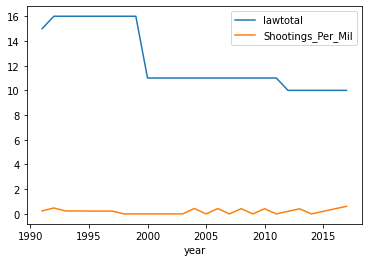

In [ ]:
df_leg_alabama = df_legislation[df_legislation["state"] == "AL"][["state", "year", "lawtotal"]]
df_leg_alabama = df_leg_alabama.drop("state", axis =1)
df_shootings_alabama = df_pop_prop2[df_pop_prop2["State"] == "AL"]
df_shootings_alabama.columns = ["state", "year", "Shootings_Per_Mil"]
df_shootings_alabama = df_shootings_alabama.drop("state", axis =1)
alabama_join = df_leg_alabama.merge(df_shootings_alabama, on="year", how="outer")
alabama_join["Shootings_Per_Mil"] = alabama_join["Shootings_Per_Mil"].fillna(0)
alabama_join.plot.line(x = "year", y = ["lawtotal", "Shootings_Per_Mil"])

**Comparing shootings per capita in Alabama and the number of gun laws from 1991-2017**

# States with the Least Shootings

In [ ]:
df_shootings_state = df_pop_prop.groupby("State").sum().sort_values(by=["Shootings_Per_Mil"], ascending=True)
df_last10 = df_shootings_state.head(n=10)
df_last10.reset_index(inplace=True)
df_last10

,State,Shootings_Per_Mil
0,WV,0.551938
1,NJ,1.052352
2,MA,1.110783
3,VA,1.368878
4,ID,1.378027
5,HI,1.439575
6,ND,1.486788
7,MN,1.548617
8,AZ,1.594577
9,VT,1.605415


**States that had the lowest rate of shootings per capita**

In [ ]:
last_10_states = df_last10["State"].unique().tolist()
last_10_states

['WV', 'NJ', 'MA', 'VA', 'ID', 'HI', 'ND', 'MN', 'AZ', 'VT']

In [ ]:
df_pop_prop_last = df_pop_prop.reset_index()
df_pop_prop_last = df_pop_prop_last[df_pop_prop_last["State"].isin(last_10_states) == True]
df_pop_prop_last.head()

,State,Year,Shootings_Per_Mil
26,AZ,2000,0.581329
27,AZ,1992,0.255380
28,AZ,2007,0.162135
29,AZ,2012,0.156445
30,AZ,2014,0.148556


In [ ]:
chart = Chart(df_pop_prop_last).mark_line().encode(
    x="Year",
    y="Shootings_Per_Mil",
    color="State"
)
chart.encode(Y("Shootings_Per_Mil", scale=Scale(domain=[0, 1])))

alt.Chart(...)

****Line plots of the number shootings per capita for the 10 states with the least shootings from 1991-2017****

In [ ]:
df_legislation_last10= df_legislation[df_legislation["state"].isin(last_10_states) == True]
df_legislation_last10.head()

,state,year,age18longgunpossess,age18longgunsale,age21handgunpossess,age21handgunsale,age21longgunpossess,age21longgunsale,age21longgunsaled,alcoholism,...,universal,universalh,universalpermit,universalpermith,violent,violenth,violentpartial,waiting,waitingh,lawtotal
2,AZ,1991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
10,HI,1991,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,38
11,ID,1991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
20,MA,1991,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,55
22,MN,1991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,15


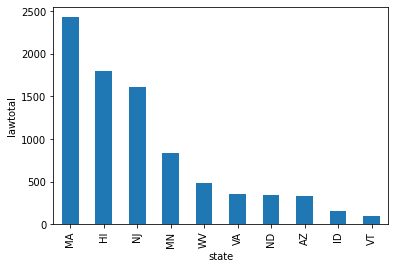

In [ ]:
df_laws_last_10= df_legislation[df_legislation["state"].isin(last_10_states) == True]
df_laws_last_10.groupby("state")["lawtotal"].sum().sort_values(ascending = False).plot.bar(ylabel = "lawtotal")

**Bar plot of the total number of gun laws for the 10 states with the least number of shootings per capita from 1991-2017**

In [ ]:
Chart(df_legislation_last10).mark_line().encode(
    x="year",
    y="lawtotal",
    color="state"
)

alt.Chart(...)

**Line plots of the the number of gun laws in the top 10 states with the least number of shootings per capita over the time period 1991-2017**

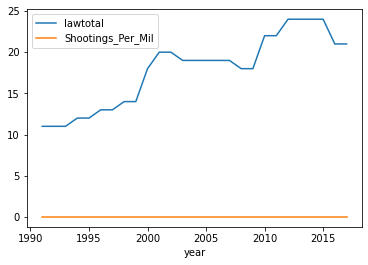

In [ ]:
df_leg_west_virginia = df_legislation[df_legislation["state"] == "WV"][["state", "year", "lawtotal"]]
df_leg_west_virginia = df_leg_west_virginia.drop("state", axis =1)
df_leg_west_virginia.head()
df_shootings_west_virginia = df_pop_prop2[df_pop_prop2["State"] == "WV"]
df_shootings_west_virginia.columns = ["state", "year", "Shootings_Per_Mil"]
df_shootings_west_virginia = df_shootings_west_virginia.drop("state", axis =1)
west_virginia_join = df_leg_west_virginia.merge(df_shootings_west_virginia, on="year", how="outer")
west_virginia_join["Shootings_Per_Mil"] = west_virginia_join["Shootings_Per_Mil"].fillna(0)
west_virginia_join.plot.line(x = "year", y = ["lawtotal", "Shootings_Per_Mil"])

**Comparing shootings per capita in West Virginia (state with the least number of shootings per capita) and the number of gun laws from 1991-2017**

# States with the Most Gun Laws

In [ ]:
# table for all laws
df_laws_state = df_legislation.groupby("state")["lawtotal"].sum().sort_values(ascending = False)
df_laws_state = df_laws_state.to_frame()
df_laws_state.reset_index(inplace=True)
df_laws_state.head()

,state,lawtotal
0,MA,2434
1,CA,2298
2,HI,1796
3,CT,1768
4,NJ,1607


In [ ]:
df_top10_laws = df_laws_state.head(n=10)
df_top10_laws

,state,lawtotal
0,MA,2434
1,CA,2298
2,HI,1796
3,CT,1768
4,NJ,1607
5,IL,1542
6,NY,1514
7,MD,1314
8,RI,1172
9,PA,845


In [ ]:
top_10_laws = df_top10_laws["state"].unique().tolist()
top_10_laws

['MA', 'CA', 'HI', 'CT', 'NJ', 'IL', 'NY', 'MD', 'RI', 'PA']

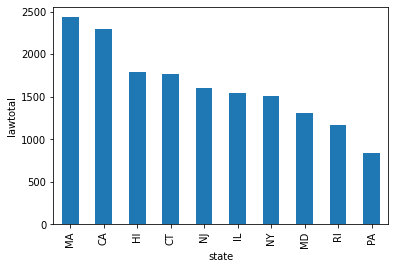

In [ ]:
df_laws_top_10= df_legislation[df_legislation["state"].isin(top_10_laws) == True]
df_laws_top_10.groupby("state")["lawtotal"].sum().sort_values(ascending = False).plot.bar(ylabel = "lawtotal")

**Bar plot of the top 10 states with the most gun laws**

In [ ]:
df_laws_state2 = df_legislation.groupby(["state", "year"])["lawtotal"].sum().sort_values(ascending = False)
df_laws_state2 = df_laws_state2.to_frame()
df_laws_state2.reset_index(inplace=True)
df_laws_state2 = df_laws_state2[df_laws_state2["state"].isin(top_10_laws) == True]
df_laws_state2.head()

,state,year,lawtotal
0,CA,2017,106
1,CA,2016,104
2,CA,2015,102
3,MA,1999,100
4,MA,2017,100


In [ ]:
Chart(df_laws_state2).mark_line().encode(
    x="year",
    y="lawtotal",
    color="state"
)

alt.Chart(...)

**Line plot of number of gun laws for the top 10 states with the most gun laws from 1991-2017.**

# Gun Law Categories

In [ ]:
age = ['age18longgunpossess', 'age18longgunsale','age21handgunpossess', 'age21handgunsale',
                     'age21longgunpossess','age21longgunsale', 'age21longgunsaled', 'amm18', 'amm21h']
background_checks = ['universal','universalh','gunshow','gunshowh','universalpermit','universalpermith','backgroundpurge','threedaylimit','mentalhealth',
                                   'statechecks','statechecksh','statechecksh']

buyer_regulations = ['waiting','waitingh', 'permit','permith','permitlaw','fingerprint','training','registration','registrationh',
                                   'defactoreg','defactoregh','loststolen','onepermonth']
dealer_regulations = ['dealer','dealerh','recordsdealer','recordsdealerh','recordsall','recordsallh','reportdealer','reportdealerh',
                                    'reportall','reportdealerh','purge','residential','theft','security','inspection','liability','junkgun']

domestic_violence =  ['mcdv','mcdvdating','mcdvsurrender','mcdvsurrendernoconditions',
                        'mcdvsurrenderdating','mcdvremovalallowed','mcdvremovalrequired','incidentremoval','incidentremoval','incidentall',
                        'dvrodating','expartesurrender','expartesurrendernoconditions','expartesurrenderdating','dvroremoval','stalking']
buyer_prohibition = ['felony','violent','violenth','violentpartial','invcommitment','invoutpatient','danger',
                                    'drugmisdemeanor','alctreatment','alcoholism']                                
possession_regulations = ['gvro','gvrolawenforcement','college','collegeconcealed','elementary',
                                         'opencarryh','opencarryl','opencarrypermith','opencarrypermitl']

bans = ['assault','onefeature','assaultlist','assaultregister','assaulttransfer',
                       'magazine','tenroundlimit','magazinepreowned']
child_safety = ['lockd','lockp','lockstandards','locked','capliability',
                                'capaccess','capuses','capunloaded','cap18','cap16','cap14']
                              

In [ ]:
df_legislation['age'] = df_legislation[age].sum(axis=1)
df_legislation['background_checks'] = df_legislation[background_checks].sum(axis=1)
df_legislation['buyer_regulations'] = df_legislation[buyer_regulations].sum(axis=1)
df_legislation['dealer_regulations'] = df_legislation[dealer_regulations].sum(axis=1)
df_legislation['domestic_violence'] = df_legislation[domestic_violence].sum(axis=1)
df_legislation['buyer_prohibition'] = df_legislation[buyer_prohibition].sum(axis=1)
df_legislation['possession_regulations'] = df_legislation[possession_regulations].sum(axis=1)
df_legislation['bans'] = df_legislation[bans].sum(axis=1)
df_legislation['child_safety'] = df_legislation[child_safety].sum(axis=1)
df_legislation

,state,year,age18longgunpossess,age18longgunsale,age21handgunpossess,age21handgunsale,age21longgunpossess,age21longgunsale,age21longgunsaled,alcoholism,...,lawtotal,age,background_checks,buyer_regulations,dealer_regulations,domestic_violence,buyer_prohibition,possession_regulations,bans,child_safety
0,AL,1991,0,0,0,0,0,0,0,1,...,15,0,0,1,7,0,1,0,0,0
1,AK,1991,0,0,0,0,0,0,0,0,...,10,0,0,0,0,0,1,1,0,0
2,AZ,1991,0,0,0,0,0,0,0,0,...,12,0,0,0,0,0,3,1,0,0
3,AR,1991,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,3,1,0,0
4,CA,1991,0,1,0,1,0,0,0,1,...,58,2,12,3,12,2,7,5,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,VA,2017,0,0,0,0,0,0,0,0,...,13,0,0,0,0,0,4,1,0,0
1346,WA,2017,1,0,0,0,0,0,0,0,...,43,1,12,3,7,4,4,3,0,0
1347,WV,2017,0,1,0,1,0,0,0,1,...,21,4,0,0,1,5,6,0,0,0
1348,WI,2017,1,1,0,0,0,0,0,0,...,23,2,0,0,0,2,5,1,0,2


In [ ]:
categories = ['age','background_checks','buyer_regulations','dealer_regulations','domestic_violence','buyer_prohibition','possession_regulations','bans','child_safety']
df_legislation_categories = df_legislation[categories]

df_legislation_categories.loc['Laws_Total']= df_legislation_categories.sum(numeric_only=True, axis=0)
df_legislation_categories.tail(n=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,age,background_checks,buyer_regulations,dealer_regulations,domestic_violence,buyer_prohibition,possession_regulations,bans,child_safety
Laws_Total,1628,2744,2130,3676,2627,3529,3009,632,1846


**The total number of laws in each category.**